In [1]:
import numpy as np
import math

## Ex.1
### Write a python program to calculate the area of a triangle given 3 sides (8, 6 and 10).

In [2]:
import math
a = 8
b = 6
c = 10
p = (8+6+10)/2

Area = math.sqrt(p*(p-a)*(p-b)*(p-c)) # Heron's Method

print('The are of a triangle is {}'.format(Area))

The are of a triangle is 24.0


## Ex.2
### Write a python program to flip a coin 1000 times and count the number of heads

In [3]:
import random
#simulations typically make use of random numbers 
 
n = 1000 #this value can easily be changed to change the sample size
heads = 0
 
for i in range(n):
    flip = random.randint(1,2) # get a random number between 1 and 2
    if flip == 1: # head
        heads = heads + 1



print('The number of head is {}'.format(heads))

The number of head is 514


## Ex.3
### Write a python program to round the value of Pi to 5 decimal digits.

In [4]:
es = 0.5*pow(10, 2-5)
ea = 100
i = 0
sum = 0
prev_sum = 0
while ea > es:
    sum = sum + ((-1)**i) / ((2*i)+1)
    ea = abs((sum-prev_sum)/sum)*100
    prev_sum = sum
    #print('interval:{} appoximate_error:{} sum:{}'.format(i,ea,sum))
    i += 1
# end while
print(sum*4)

3.1416005075068716


## Ex.4
### Write a python program to convert a number in base 10 to base 2 (including number n with |n| < 1) and vice versa.

In [5]:
def dec_bin(dec):
    if type(dec) == int:
        result = convert_int_bin(dec)
    else:
        result = convert_float_bin(dec)
    print(result)


def convert_int_bin(dec):
    if dec == 0:
        return '0'
    int_bin = ''
    while dec != 0:
        int_bin += str(dec%2)
        dec = dec//2
    # end while
    return int_bin[::-1]


def convert_float_bin(dec):
    # convert to string
    dec = str(dec)
    dec = dec.split('.')
    # call another function to convert integer part to binary.
    int_part = convert_int_bin(int(dec[0]))
    # convert string to float.
    flo_part = float('0.'+dec[1])
    size = len(str(flo_part))-2
    i = 0
    # check repeat number.
    check = flo_part
    flo_bin = ''
    while i < 32:
        flo_part = flo_part*2
        flo_bin += str(int(flo_part//1))
        flo_part = flo_part%1
        i+=1
        # repeat number then stop
        if check == round(flo_part,size):
            break
    # end while
    # return full part of binary.
    return int_part+'.'+flo_bin


In [6]:
dec_bin(0.25)

0.01000000000000000000000000000000


In [7]:
def bin_dec(bin):
    if type(bin) == int:
        result = convert_bin_int(bin)
    else:
        result = convert_bin_float(bin)
    print(result)
    

def convert_bin_int(bin):
    if bin == 0:
        return '0'
    bin = str(bin)
    size = len(bin)-1
    dec = 0
    for i in bin:
        if i == '1':
            dec += 2**size
        size -= 1
    return int(dec)

def convert_bin_float(bin):
    bin = str(bin)
    bin = bin.split('.')
    int_part, flo_part = bin[0], bin[1]
    int_part = convert_bin_int(bin[0])
    size = -1
    flo = 0
    for i in flo_part:
        if i == '1':
            flo += 2**size
        size -=1 
    return int_part + float(flo)

In [8]:
bin_dec(10)

2


## Ex.5
### Write a python program to convert a number in base 10 to IEEE-754 32 bits: input is a number in base 10 and output is a list of 3 numbers: sign, exponent and fraction.

In [9]:
def dec_to_ieee(N):
    print('Decimal :',N)
    sign = float(N)
    
    # split in integer part and float part.
    temp = N.split('.')
    
    # step2: Calculate integer part to binary
    Integer = ''
    N = temp[0]
    # step1: Convert string to positive integer.
    N = abs(int(N)) 
    if(N != 0):
        while N > 0:
            remainder = N % 2
            N = N // 2
            Integer += str(remainder)
        # end while
    else:
        Integer = '0'
    # Reverse the binary
    Integer = Integer[::-1]
    # End calculate integer part to binary

    # step3: Calculate floating part
    y = temp[1]
    length = len(y)
    # Convert string to floating-point
    y = float(y) / (10**length)
    Float = ''
    for i in range(0, 28):
        y = y * 2
        Float += str(int(y // 1))
        y = y % 1
    # end for
    # End calculate floating part

    #step4: Summarizing - the positive number before normalization:
    result = Integer + Float
    counter = 0
    
    # step5: Calulate exponent to binary.
    # Normalize the binary representation of the number..
    # find one non-zero digit stays to the left of the decimal point.
    # use counter to count the one non-zero left most
    # 1 1001.0101 1000 1101 0100 1111 1101(2) × 2^0
    # 1.1001 0101 1000 1101 0100 1111 1101(2) × 2^4 (exponent = 4)
    for i in result:
        counter += 1
        if i == '1':
            break
    # end for
    # shift to the right.
    if(counter > len(Integer)+1):
        exponent = len(Integer) - counter
    # shift to the left.
    else:
        exponent = counter - len(Integer)
        exponent = abs(exponent)
    # adjusted exponent by + 127
    exponent = exponent + 127
    # Convert exponent to binary
    bin_exponent = ''
    while exponent > 0:
        remainder = exponent % 2
        exponent = exponent // 2
        bin_exponent += str(remainder)
    # End calculate exponent to binary

    print('Sign :', '0' if sign >= 0 else '1')
    print('Exponent :', bin_exponent[::-1].zfill(8))
    # Normalize the mantissa(fraction), remove the leading (leftmost) bit,
    # since it's allways '1' (and the decimal point) and adjust
    # its length to 23 bits, by removing the excess bits from
    # the right (losing precision...):
    fraction = result[counter::]
    print('Fraction :', fraction[0:23])
    if sign >= 0:
        IEEE = '0-'
    else:
        IEEE = '1-'
    return IEEE + bin_exponent[::-1].zfill(8) + '-' + fraction[0:23]

In [10]:
dec_to_ieee('25.37')

Decimal : 25.37
Sign : 0
Exponent : 10000011
Fraction : 10010101111010111000010


'0-10000011-10010101111010111000010'

## Ex6.
### We know that tan 𝜋/4 = 1. Use the following Taylor series expansion for arctan to evaluate the value of 𝜋 for up to 6 significant digits.

In [53]:
es = 0.5*pow(10, 2-6)
ea = 100
n = 1
prev = 0
x = 1
n = 1
s = 0
while ea > es :
    p = (2*n)-1
    y = ((x**p)/p)*((-1)**(n+1))
    s+= y
    ea = abs((s-prev)/s)*100
    prev = s
    n+=1
print(s*4)

3.14159343898711


In [54]:
import matplotlib.pyplot as plt

## Ex7.
### For function 𝑓(𝑥) = 𝑒􀬿􀯫 − ln (𝑥),
### a. Plot 𝑓(𝑥)
### b. Solve 𝑓(𝑥) = 0 using eye-balling methods, interval search, Newton-Raphson, bisection and false position.

In [55]:
def f(x):
    return np.e**(-x) - np.log(x)

In [56]:
def df(x):
    return (-1) * ((np.e**(-x) * x+1)/x)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9]


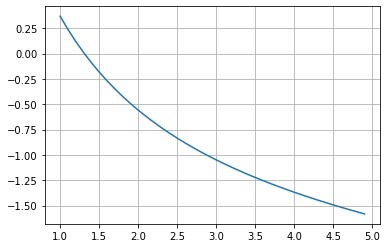

In [61]:
# Prepare the data
x = np.arange(1,5,0.1)
print(x)
y = f(x)
# Plot the data
plt.plot(x, y)
plt.grid()
# Show the plot
plt.show()

In [16]:
def interval_search(L,U,N,p):
    #stopping criterion 
    es = 0.5*(10**(2-p))
    # divide the interval from L to U into N ticks
    # N ticks mean (N-1) number of intervals
    ea = 100
    prev_xr = U
    
    while (ea > es): 
            x = np.linspace(L,U,N)
            for k in range(0,N-1):       
                if(f(x[k]) * f(x[k+1]) <0 ):
                    L= x[k]
                    U = x[k+1]
                    xr = (x[k]+x[k+1])/2
                    #print('There is a root inside [{},{}]. The estimated root at {}'.format(x[k],x[k+1],xr))
                else:
                        pass
                #end if
           #end for
            ea = abs((xr-prev_xr)/xr)*100
            prev_xr = xr
    print('found root in [{},{}] xr = {}'.format(L, U , xr))
    print('approxmate error =',ea)
    #end while
#end function

In [17]:

def newton(f,df,x0,p):
    es = 0.5 *(10**(2-p))
    x = prev_x = float(x0)
    i = 0
    ea = 100
    while ea > es:
        x = x - (f(x)/df(x))
        ea = abs((x-prev_x)/x) * 100
        prev_x = x
        i += 1
    print('found root x = {}'.format(x))
    print('approxmate error =',ea)

In [18]:
def bisection(xl,xu,p):
    #stopping criterion 
    es = 0.5*(10**(2-p))
    # divide the interval from L to U into N ticks
    # N ticks mean (N-1) number of intervals
    ea = 100
    prev_xr = xu
    i = 1
    while(ea > es):
        xm = (xl + xu)/2
        if (f(xl) * f(xm) >0):
            xl = xm
            #xu = xu
        else:
            #xl = xl
            xu = xm
        #end if
            xr = (xl+xu)/2
            ea = abs((xr-prev_xr)/xr)*100
            prev_xr = xr
            #print('Iteration #{} ,new interval = [{}.{}], xr  = {}, ea = {}'.format(i,xl,xu,xr,ea))
            i += 1
    print('found root in [{},{}] xr = {}'.format(xl, xu, xr))
    print('approxmate error =',ea)  
    #end while
#end function

In [19]:
def falseposition(xl,xu,p):
    #stopping criterion 
    es = 0.5*(10**(2-p))
    # divide the interval from L to U into N ticks
    # N ticks mean (N-1) number of intervals
    ea = 100
    prev_xr = xu
    i = 1
    while(ea > es):
       # xm = (xl + xu)/2
        xr = xu- f(xu)*(xu-xl)/(f(xu)-f(xl))
        if (f(xl) * f(xr) >0):
            xl = xr
            #xu = xu
        else:
            #xl = xl
            xu = xr
        #end if
            #xr = xu- f(xu)*(xu-xl)/(f(xu)-f(xl))
            ea = abs((xr-prev_xr)/xr)*100
            prev_xr = xr
           # print('Iteration #{} ,new interval = [{}.{}], xr  = {}, ea = {}'.format(i,xl,xu,xr,ea))
            i += 1
    #end while
    print('found root in [{},{}] xr = {}'.format(xl, xu , xr))
    print('approxmate error =',ea)
#end function

In [20]:
print('Interval search:')
interval_search(1,2,11,4)
print('Bisection:')
bisection(1, 2 , 4)
print('False position:')
falseposition(2, 3 , 4)
print('Newton:')
newton(f,df,0.1,4)

Interval search:
found root in [1.30979,1.3098] xr = 1.309795
approxmate error = 0.0034356521440264097
Bisection:
found root in [1.3097991943359375,1.3098030090332031] xr = 1.3098011016845703
approxmate error = 0.00014562124206182205
False position:
found root in [1.309799585804151,1.3097995858041505] xr = 1.3097995858041505
approxmate error = 0.0
Newton:
found root x = 1.3097995858021254
approxmate error = 0.00016913260022364605


## Task8
### For function 𝑓(𝑥) = 𝑥􀬶 − ln(𝑥) − 5
### a. Find minimum using calculus, equal interval search, golden section search, parabolic interpolation
### b. Solve 𝑓(𝑥) = 0 using eye-balling methods, interval search, Newton-Raphson, bisection and false position.

In [21]:
def f(x):
    return x**2 - np.log(x)-5

In [22]:

def df(x):
    return 2*x - (1/x)

In [23]:
def interval_search_min(f,a,b,p):
    es = 0.5*(10**(2-p))
    ea = 100
    prev_xmin = b
    
    i=1
    while(ea>es):
        epsilon = (b-a)/10
        xmid  = (a+b)/2
        alpha = xmid-(epsilon/2)
        beta = xmid+(epsilon/2)
        if (f(beta) < f(alpha)):
            #[a,b] = [aplha,b]
            a = alpha
            #b=b
            xmin = (a+b)/2
        else:
            #[a,b] = [a,beta]
            #a=a
            b=beta
            xmin = (a+b)/2
        #end if
        ea = abs((xmin-prev_xmin)/xmin) * 100
        prev_xmin = xmin
        i= i+1
    #end while
    print('[a,b] = [{},{}] , xmax = {} , ea = {}'.format(a,b,xmin,ea))
#end function

In [24]:
interval_search_min(f,0.5,1.0,4)

[a,b] = [0.707099880201148,0.7071636199498268] , xmax = 0.7071317500754875 , ea = 0.0036874813964279116


In [25]:
def golden_min(f,xl,xu,p):
    es  = 0.5 * (10**(2-p))
    ea = 100
    #prev_xmin = xu
    i=1
    phi = (1+math.sqrt(5))/2
    
    while (ea>es):
        d = (phi-1)*(xu - xl)
        x1 = xl + d
        x2 = xu - d
        if(f(x1)>f(x2)):
            #[xl,xu] = [xl,x1]
            xu = x1
            xmin = x2
        else:
            #[xl,xu] = [x2,xl]
            #xu=xu
            xl = x2
            xmin = x1
        #end if
        ea = (2 - phi)*abs((xu-xl)/xmin)*100
        i +=1
    #end while
    print('[xl,xu] = [{},{}] , xmin = {} , ea = {}'.format(i,xl,xu,xmin,ea))
#end function

In [26]:
golden_min(f,0.5,1.0,4)

[xl,xu] = [19,0.707071172864907] , xmin = 0.7071577080007632 , ea = 0.707104226345583


In [27]:
def parabolic_min(f,x1,x2,x3,p):
    es = 0.5*(10**(2-p))
    ea = 100
    prev_xmin = x2
    i = 1
    while(ea>es):
        alpha1 = (x2-x1)*(x2-x1)*(f(x2)-f(x3))
        alpha2 = (x2-x3)*(x2-x3)*(f(x2)-f(x1))
        beta1 = (x2-x1)*(f(x2)-f(x3))
        beta2 = (x2-x3)*(f(x2)-f(x1))
        gamma = (alpha1 - alpha2)/(beta1 - beta2)
        x4 = x2 - (0.5 * gamma)
       
        if(x4>x2):
            
            x1 = x2
            x2 = x4
            xmin = x4
        else:
           
            x3 = x2
            x2 = x4
            xmin = x4
        #end if
        ea = abs((xmin - prev_xmin)/xmin) * 100
        prev_xmin = xmin
        i +=1
    #end while
    print('[x1,x2,x3] = [{},{},{}] , xmin = {} , ea = {}'.format(i,x1,x2,x3,xmin,ea))
#end function

In [28]:
parabolic_min(f,0.5,0.6,1.0,4)

[x1,x2,x3] = [7,0.6,0.7071122195936155] , xmin = 0.707126837758659 , ea = 0.7071122195936155


In [29]:
print('Interval search:')
interval_search(2.3,2.5,11,4)
print('Bisection:')
bisection(2, 3 , 4)
print('False position:')
falseposition(2, 3 , 4)
print('Newton:')
newton(f,df,2.3,4)

Interval search:
found root in [2.4261600000000003,2.42618] xr = 2.42617
approxmate error = 0.0028852059006588366
Bisection:
found root in [2.4261474609375,2.426177978515625] xr = 2.4261627197265625
approxmate error = 0.000628926862095207
False position:
found root in [2.426172930824792,2.4261729308247935] xr = 2.4261729308247935
approxmate error = 0.0
Newton:
found root x = 2.4261729308291877
approxmate error = 0.00017479091813871558


## Task9
### Matrix
### a. Use python to test whether a matrix is a zero matrix, symmetric matrix, identity matrix, upper triangular matrix.
### b. Use python to find determinant minor, cofactor, adjoint and inverse of a matrix.

In [30]:
def is_square(matrix):
    

    for array in matrix: print(array)
    print(" ")
    square = True
    rows, colums = a.shape
    if rows == colums:
        square =  True
    else:
        square =  False
            
    
    if(square):
        print('This is square matrix')
    else:
        print('This is not square matrix')

In [31]:
def is_symmetrical(matrix): 
    rows = len(matrix)  
    cols = len(matrix[0])
    for array in matrix: print(array)
    print(" ")
    sym = True
    if(rows == cols):
        for i in range(rows): 
            for j in range(cols): 
                if (matrix[i][j] != matrix[j][i]): 
                    sym =  False
        sym =  True
    else:
        sym = False
    
    
    
    
    
    
    if(sym):
        print('This is symmetrical matrix')
    else:
        print('This is not symmetrical matrix')

In [32]:
def is_indentity(matrix):
    check = True;  
   
    #Calculates number of rows and columns present in given matrix  
    rows = len(matrix)  
    cols = len(matrix[0])  
    
    for array in matrix: print(array)
    print(" ")
            
            
    #Checks whether given matrix is a square matrix or not  
    if(rows == cols): 
    #Checks if diagonal elements are equal to 1 and rest of elements are 0 
        for i in range(0, rows):  
            for j in range(0, cols):  
                if(i == j and matrix[i][j] != 1):  
                    check = False;  
                    break;  
                  
                if(i != j and matrix[i][j] != 0):  
                    check = False;  
                    break;
    else:
        check = False
                    
                    
                    
        if(check):  
            print("This is an identity matrix");  
        else:  
            print("This is is not an identity matrix");  

In [33]:
def is_zero(matrix):
   
    check = True
    
    rows = len(matrix)  
    cols = len(matrix[0])  
    
    for array in matrix: 
            print(array)
    if(rows == cols):
        for i in range(0, rows): 
            for j in range(0, cols) : 
              
            # condition to check 
            # other elements  
            # except main diagonal 
            # are zero or not. 
                if ((i != j) and (matrix[i][j] != 0)) : 
                    check =  False
                    break
    else:
        check = False
        
        
        
        
    if (check) : 
        print("This is a zero matrix") 
    else : 
        print("This is not a zero matrix") 
    
    

In [34]:
def is_upper_triangle(matrix):
    check = True
    
    rows = len(matrix)  
    cols = len(matrix[0])  
    for array in matrix: 
            print(array)
    if(rows == cols):
        check =  False
        r,c = a.shape
        for i in range(1,r):
            for j in range(0,i):
                if a[i,j] != 0:
                    check =  False
                # end if
            #end for
        #end for

        check =  True
    else: 
        check = False
        
        
        
        
    if (check) : 
        print("This is a upper triangle matrix") 
    else : 
        print("This is not a upper triangle matrix") 
    
     

In [35]:
a = np.matrix ([[ 4, 5, 9 ],
          [ 5, 0, 3 ],
          [ 5, 0, 3 ]])
b = np.matrix([
    [1,2,4,2],
    [0,1,7,3],
    [0,0,2,1],
    [0,0,0,1]
])

In [36]:
is_square(a)

[[4 5 9]]
[[5 0 3]]
[[5 0 3]]
 
This is square matrix


In [37]:
is_symmetrical(a)

[[4 5 9]]
[[5 0 3]]
[[5 0 3]]
 
This is not symmetrical matrix


In [38]:
is_indentity(a)

[[4 5 9]]
[[5 0 3]]
[[5 0 3]]
 
This is is not an identity matrix


In [39]:
is_zero(a)

[[4 5 9]]
[[5 0 3]]
[[5 0 3]]
This is not a zero matrix


In [40]:
is_upper_triangle(a)

[[4 5 9]]
[[5 0 3]]
[[5 0 3]]
This is not a upper triangle matrix


In [41]:
def deter(x):
    determainant = 0
    if len(x) == 1:
        determainant = x[0][0]
    else:
        for i in range(0,len(x[0])):
            mi = minor(x,0,i)
            newdat = (mi[0][0]*mi[1][1])-(mi[0][1]*mi[1][0])
            determainant += ((-1)**i)*x[0][i]*newdat
    return determainant

In [42]:
def minor(x,row,colum):
    matrix = []
    for i in range (0,len(x)):
        if i != row:
            keep = []
            for j in range(0,len(x[0])):
                if j != colum:
                    keep.append(x[i][j])
            matrix.append(keep)
    return matrix

In [43]:
def det(a):
    d = 0
    if len(a) == 1 :return a[0][0]
    else:
        for c in range(0,len(a)):
            temp = minor(a, 0, c)
            d = d + (-1)**c * a[0][c] * det(temp)
        # end loop
        return d


In [44]:
def minor(a, r, c):
    l = len(a)
    temp = []
    # run loop through colum 
    for j in range(l):
            temp2 = []
            # run loop through row
            for i in range(len(a[0])):
                # cut the row and colum to get minor
                if  j != c and i != r :
                    temp2.append(a[i][j])
                # end if
            # end for j
            # if temp2 is not empty
            if temp2:
                temp.append(temp2)
        #end if
    #end for i
    return temp

In [45]:
# find complete minor.
def find_minor(a):
    # normaly we have to check square matrix first.
    m = []
    for i in range(len(a)):
        for j in range(len(a)):
            # find det of small minor
            x = det(minor(a,i,j))
            m.append(x)
        # end j loop
    # end i loop
    # return in 2d matrix.
    return numpy.array(m).reshape(len(a),len(a))

In [46]:
def cofactor(a):
    a = find_minor(a)
    for i in range(len(a)):
        for j in range(len(a)):
            a[i][j] = (-1)**(i+j) * a[i][j]
       # end j loop
    # end i loop
    return a

In [47]:
def transpose(a):
    rows, colums = len(a),len(a)
    temp = numpy.empty((rows,colums),dtype=int)
    for i in range(rows):
        for j in range(colums):
            temp[i][j] = a[j][i]
        # end for
    # end for
    return temp


In [48]:
def adjoint(a):
    return transpose(cofactor(a))

In [49]:
def inverse(a):
    # normaly check square matrix
    # determinate must not equal 0
    deter = det(a)
    if deter == 0:
        return False
    else:
        inv = []
        adj = adjoint(a)
        for i in range(len(a)):
            temp = []
            for j in range(len(a)):
                temp.append(adj[i][j] / deter)
            # end j loop
            inv.append(temp)
        # end i loop
    return numpy.array(inv)

In [50]:

a = numpy.array([
    [3, -2, 4],
    [-2, 6, 2],
    [4, 2, 3],
    ])
b = np.matrix([
    [3, -2, 4],
    [-2, 6, 2],
    [4, 2, 3],
    ])

NameError: name 'numpy' is not defined

In [ ]:
deter(a)

In [ ]:
find_minor(a)

In [ ]:
cofactor(a)

In [ ]:
adjoint(a)

In [ ]:
inverse(a)

##  Ex.10
### Given a system of linear equations such as this one below, find the solution using inverse matrix, Cramer’s rule, row operation, and Gauss’s Elimination methods

In [ ]:
A = np.matrix([
    [1,2,1,-1],
    [3/2,1,2,2],
    [4,4,3,4],
    [2/5,1/5,0,1]
])
b = np.matrix([
    [5],
    [8],
    [22],
    [3]
])

In [ ]:
Ab = np.append(A,b,axis=1)

In [ ]:
Ab

### inverse matrix

In [ ]:
inverseA = np.linalg.inv(A)

In [ ]:
x = np.dot(inverseA,b)

In [ ]:
x

### Gauss’s Elimination methods

In [ ]:
def fwd_elim(Ab):
    Abx = Ab.copy()
    [nr,nc] = Abx.shape
    
    for i in range(1,nr):
        
        for r in range(i,nr):
            print('Iteration #{}  index = {}'.format(i,r))
            row_factor = Abx[r,i-1]/Abx[i-1,i-1]
            Abx[r,:] = Abx[r,:] - Abx[i-1,:]*row_factor
        #end for r
    #end for i
    print(Abx)
    return Abx
#end fuction

In [ ]:
def back_sub(Ab):
    Abx = Ab.copy()
    [nr,nc] = Abx.shape
    
    x = np.empty(nr)
    for r in range(nr-1,-1,-1):
        print('r = {}'.format(r))
        sum_of_product = 0
        for i in range(r+1,nr):
            print('i = {}'.format(i))
            product = Abx[r,i]*x[i]
            sum_of_product = sum_of_product + product
        #end for
        x[r] = (Abx[r,nc-1] - sum_of_product)/Abx[r,r]
    
    #end for
    print(x)
    return x
#end fuction
    

In [ ]:
ab_re = fwd_elim(Ab)

In [ ]:
ab_re2 = back_sub(ab_re)

In [ ]:
def Cramer_rule(A,B):
    size = A.shape
    ans = np.empty(size[0])
    for i in range(size[0]):
        ax = A.copy()
        ax[:,i] = B
        ans[i] = np.linalg.det(ax)/np.linalg.det(A)
    print(ans)


In [ ]:
Cramer_rule(A,b)

### row operation

In [ ]:
A =np.matrix([
    [1, 2, 1, -1],
    [3/2, 1, 2, 2],
    [4, 4, 3, 4],
    [2/5, 0, 1/5,1]
],dtype=float)
B = np.matrix([
    [5],
    [8],
    [22],
    [3]
],dtype=float)
M = np.append(A,B,axis=1)

M[1,:] = M[1,:]*2
print(M)
M[3,:] = M[3,:]*5
print(M)
eq5 = M[1,:] - (M[0,:]*3)
print(eq5)
M = np.append(M,eq5,axis=0)
print(M)
eq6 = M[2,:] - (M[3,:]*2)
print(eq6)
M = np.append(M,eq6,axis=0)
print(M)
eq7 = M[5,:] + M[4,:]
print(eq7)
M = np.append(M,eq7,axis=0)
print(M)
eq8 = M[3,:] - (M[0,:]*2)
print(eq8)
M = np.append(M,eq8,axis=0)
print(M)
eq9 = M[7,:] + M[5,:]
print(eq9)
M = np.append(M,eq9,axis=0)
print(M)
eq10 = M[6,:] - M[8,:]
eq10 = eq10/2
print(eq10)
M = np.append(M,eq10,axis=0)
print(M)
eq11 = M[4,:] - (M[8,:]*7)
eq11 = eq11 - M[9,:]
eq11 = (-1)*(eq11/4)
print(eq11)
M = np.append(M,eq11,axis=0)
print(M)
eq12 = M[0,:] + M[8,:]
eq12 = eq12 - M[9,:]
eq12 = eq12 - (2*M[10,:])
print(eq12)
M = np.append(M,eq12,axis=0)
print(M)

## Ex.11
### Write a python program to
### a. find the highest point and the time to reach the highest point of a ball throwing like
### a projectile motion with the following relationship 𝑦(𝑡) = 𝑦􀯜 + 𝑣􀯜􀯬 𝑡 +1 2 𝑔𝑡􀬶
### where 𝑦􀯜 = 10 m, 𝑣􀯜􀯬 = 60 m/s, and 𝑔 = 9.8 m/s2.
### b. find the time that the ball will hit the ground (𝑦(𝑡) = 0) again.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def f(t):
    return 10+(60*t)+((1/2)*-9.8*(t**2))

In [ ]:
x = np.arange(0,13.5,0.1)
y = f(x)

In [ ]:
plt.plot(x,y)
plt.grid()
plt.show()

In [ ]:
def bisection(l, u):
    xl = l
    xu = u
    xr = 0
    es = 0.5*pow(10, 2-4)
    prev_xr = 0
    ea = 100
    while ea > es:
        mid = (xl+xu)/2
        if f(xl)*f(mid) < 0:
            xu = mid
        else:
            xl = mid
        xr = (xl+xu)/2
        # print('found root in ({},{}) = {}'.format(xl, xu, xr))
           
        ea = abs((xr-prev_xr)/xr) * 100
        prev_xr = xr
        # print('approxmate error =',ea)
    print('found root in [{},{}] xr = {}'.format(xl, xu, xr))
    print('approxmate error =',ea)
    return xr

In [ ]:
hit_ground = bisection(12,14)
# 12 กับ 14 มาจากการดูกราฟช่วงนี้ กราฟตัดแกน x ที่ y=0

In [ ]:
def parabolic_max(f,x1,x2,x3,p):
    es = 0.5*(10**(2-p))
    ea = 100
    prev_xmax = x2
    i = 1
    while(ea>es):
        alpha1 = (x2-x1)*(x2-x1)*(f(x2)-f(x3))
        alpha2 = (x2-x3)*(x2-x3)*(f(x2)-f(x1))
        beta1 = (x2-x1)*(f(x2)-f(x3))
        beta2 = (x2-x3)*(f(x2)-f(x1))
        gamma = (alpha1 - alpha2)/(beta1 - beta2)
        x4 = x2 - (0.5 * gamma)
       
        if(x4<2):
            #[x1,x2,x3] = [x1,x4,x2]
            x3 = x2
            x2 = x4
            xmax = x4
        else:
            #[x1,x2,x3] = [x2,x4,x3]
            x1 = x2
            x2 = x4
            xmax = x4
        #end if
        ea = abs((xmax - prev_xmax)/xmax) * 100
        print('Iteration #{}: [x1,x2,x3] = [{},{},{}] , xmax = {} , ea = {}'.format(i,x1,x2,x3,xmax,ea))
        prev_xmax = xmax
        i +=1
    #end while
    return xmax
#end function

In [ ]:
xmax = parabolic_max(f,0,6,12,5)

In [ ]:
f(xmax) # บอลขึ้นได้สูงสุด 193.67 m

In [ ]:
hit_ground # บอลจะตกถึงพื้นเมื่อ t=12.40966...

## Ex.12

In [51]:
x = 1
while(70000*2*x <= 500000*12 + 40000*x + 12*20000*(x/20)):
    x+=1
print('The student is {}'.format(x))

The student is 69


## Ex.13

In [52]:
# ทศนิยมมันเพ้ียนๆ คิดแบบผสม(binocalculate) รุ้จักป่าว55555
useg = float(input('Customer used Energy: '))  #kw
Ft = -12.43 # s/kw
sum = 0
charge = (useg*Ft)/100 #bath
print('Customer used Energy           :   {:7.2f}    KWh/Month'.format(useg))
print('Ft                             :   {:7.2f}    Satang/KWh'.format(Ft))
print("======================================================")
if useg<=50:
    print('Free บ้านคุนพี่จุดเทียนหรอค่ะ')
    
else:
    print('Section 1 Base Tariff')
    print('First 15 kWh ( 1st – 15th)     :   {:7.2f}    Bath'.format(35.23))
    print('Next  10 kWh (16th – 15th)     :   {:7.2f}    Bath'.format(29.88))
    print('Next  10 kWh (26th – 35th)     :   {:7.2f}    Bath'.format(32.41))
    if useg>=36 and useg<100:
        sum = (useg-35)*3.6237+32.41+29.88+35.23
        print('Next  65 kWh (36th – 100th)    :   {:7.2f}    Bath'.format(sum))
    elif useg>=101 and useg<150:
        sum = 235.54
        print('Next  65 kWh (36th – 100th)    :    {:7.2f}   Bath'.format(sum))
        sum = (useg-100)*3.7171+235.54+32.41+29.88+35.23
        print('Next  50 kWh (101th – 150th)   :    {:7.2f}   Bath'.format(sum))
    elif useg>=151 and useg<400:
        sum = 235.54
        print('Next  65 kWh (36th – 100th)    :    {:7.2f}   Bath'.format(sum))
        sum = 185.86
        print('Next  50 kWh (101th – 150th)   :    {:7.2f}   Bath'.format(sum))
        sum = (useg-150)*4.2218+185.56+235.54+32.41+29.88+35.23
        print('Next  250 kWh (151th – 400th)  :   {:7.2f}   Bath'.format(sum))
    elif  useg>=401:
        sum = 235.54
        print('Next  65 kWh (36th – 100th)    :    {:7.2f}   Bath'.format(sum))
        sum = 185.86
        print('Next  50 kWh (101th – 150th)   :    {:7.2f}   Bath'.format(sum))
        sum = 1055.45
        print('Next  250 kWh (151th – 400th)  :   {:7.2f}   Bath'.format(sum))
        x = useg%400
        sum = (useg-400)*4.4217+1055.45+185.56+235.54+32.41+29.88+35.23
        print('Over  400 kWh (up from 401st)  :   {:7.2f}    Bath'.format((useg-400)*4.4217))
    
    print("======================================================")
    print('Total                          :   {:7.2f}    Bath'.format(sum))
    print('Service Charge                 :   {:7.2f}    Bath'.format(8.19))
    print()
    print('Total Base Tariff              :   {:7.2f}    Bath'.format(sum+8.19))
    print("======================================================")
    print('Section 2 [Ft] Charge')
    print('Used Energy x Ftrate           :   {:7.2f}    Bath'.format((useg*Ft)/100))
    print()
    print("======================================================")
    print('Section 3 Tax 7%')
    print('|Base Tariff + Ft| x 0.07      :   {:7.2f}    Bath'.format( (((sum+8.19)+(useg*Ft)/100))*0.07) )
    print()
    print('Total Electricity Charge       :   {:7.2f}    Bath'.format(+((sum+8.19) + ((useg*Ft)/100)) + (((sum+8.19)+(useg*Ft)/100))*0.07))
    print("======================================================")

Customer used Energy: 1
Customer used Energy           :      1.00    KWh/Month
Ft                             :    -12.43    Satang/KWh
Free บ้านคุนพี่จุดเทียนหรอค่ะ


## Ex.14

In [ ]:
def find_int_rate_month(int_rate, car_loan, n_year):
    interest = int_rate/100*car_loan
    interest *= n_year/(n_year*12)
    return interest

def find_prin_paid(salary, re_amount):
    prin_paid = salary*(re_amount/100)
    return prin_paid

def find_prin_left(total_paid, paid_month, n_year):
    prin_left = total_paid-(paid_month*n_year*12)
    return prin_left

paid_month = 1
n_year = 1
total_paid = 0

while(paid_month*n_year*12>total_paid):
    car_price = int(input('Input car price : '))
    int_rate = int(input('Input annual interested rate : '))
    n_year = int(input('Input number of year payment : '))
    down = int(input('Input down payment percentage : '))
    re_amount = int(input('Input repayment amount in percentage : '))
    salary = int(input('Input your salary : '))
    down_money = car_price*down/100
    car_loan = car_price-down_money
    
    int_paid = find_int_rate_month(int_rate, car_loan, n_year)
    
    paid_month = find_prin_paid(salary, re_amount)
    
    total_paid = car_loan+(int_paid*n_year*12)
    
    prin_left = find_prin_left(total_paid, paid_month, n_year)
    print(paid_month*n_year*12, total_paid)
    
    if paid_month*n_year*12>total_paid:
        print('Sorry your paid per month is over total price.')
        print('Please re-enter the information.')
    
print('interest paid per month : {} Baht'.format(int_paid))
print('Principle paid per month : {} Baht'.format(paid_month))
print('Principle left : {} Baht'.format(prin_left))